# **Bank Customer Churn Data Analysis**
This data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
Objective : To predict if the client will subscribe a term deposit (variable y).

Input variables: 
### Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
          'self-employed','services','student','technician','unemployed','unknown')
          
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
                           'university.degree','unknown')
                           
5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). 
##### Important note: 
this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes-

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
            (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

The models below are used to build, evaluate, and compare which one is the best:
1. Decision Tree Model
2. Logistic Regression Model
3. Random Forest Model
4. Naive Bayes Model
5. Gradient Boosting Model

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# **Loading data**
In this first step we will load our dataset

In [2]:
df_bank = pd.read_csv('bank.csv')
df_bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


**Conclusion** - Above data is not in structured format.
  So convert dataset to structured format

In [12]:
# Convert dataset to structured format
df_bank = pd.read_csv('bank.csv', delimiter=';')

In [13]:
df_bank.shape

(4521, 17)

**Conclusion** - There are 4521 rows and 17 columns

In [14]:
df_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Conclusion**
1. Dataset is having numerical and categorical data
2. Mixed data (Numerical + Categorical)
3. There are 17 features
4. 'y' is the output

  According to the dataset documentation, we need to remove the 'duration' column because this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 

In [15]:
# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataset:', df_bank.shape)
df_bank.head()

Shape of dataset: (4521, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


**Conclusion**
1. Duration column is drop 
2. Shape of dataset 4521 rows and 16 columns

In [16]:
df_bank.describe()

,age,balance,day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


# **Histogram Plot**

<AxesSubplot:xlabel='previous', ylabel='Count'>

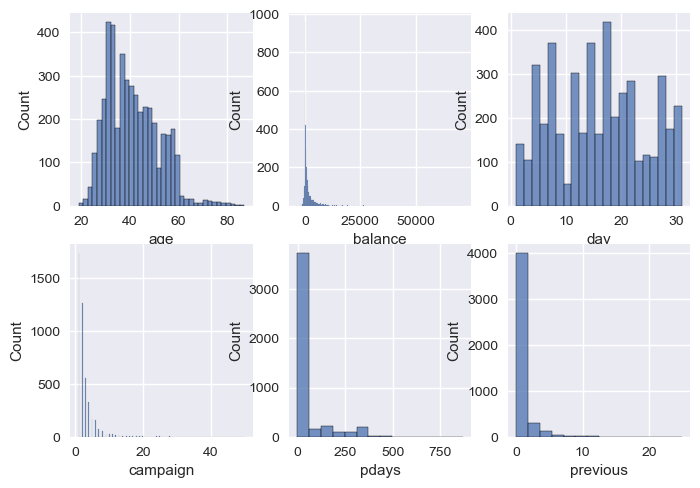

In [17]:
fig, axes = plt.subplots(2, 3) 
sns.histplot(data=df_bank, x='age', ax=axes[0,0]) 
sns.histplot(data=df_bank, x='balance', ax=axes[0,1]) 
sns.histplot(data=df_bank, x='day', ax=axes[0,2]) 
sns.histplot(data=df_bank, x='campaign', ax=axes[1,0]) 
sns.histplot(data=df_bank, x='pdays', ax=axes[1,1]) 
sns.histplot(data=df_bank, x='previous', ax=axes[1,2])

# **Distribution Plot**

<AxesSubplot:xlabel='previous', ylabel='Density'>

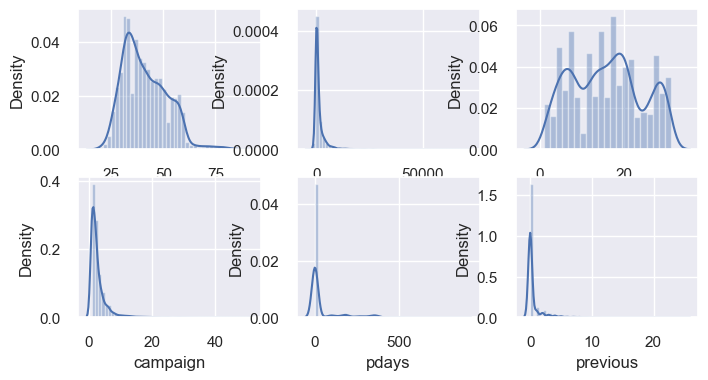

In [18]:
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,3,1)
sns.distplot(df_bank['age'])
subplot(2,3,2)
sns.distplot(df_bank['balance'])
subplot(2,3,3)
sns.distplot(df_bank['day'])
subplot(2,3,4)
sns.distplot(df_bank['campaign'])
subplot(2,3,5)
sns.distplot(df_bank['pdays'])
subplot(2,3,6)
sns.distplot(df_bank['previous'])


<AxesSubplot:xlabel='age'>

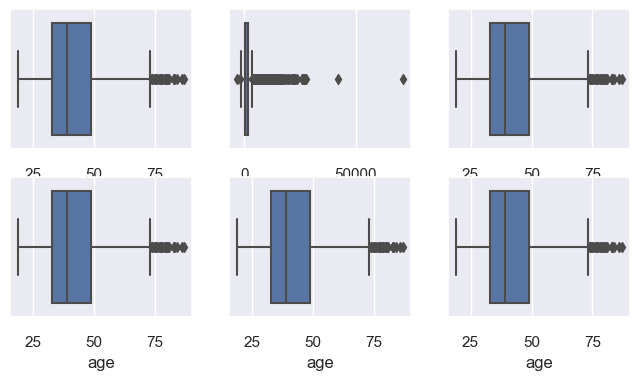

In [19]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0,0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0,1])
sns.boxplot(data=df_bank, x='age', ax=axes[0,2])
sns.boxplot(data=df_bank, x='age', ax=axes[1,0])
sns.boxplot(data=df_bank, x='age', ax=axes[1,1])
sns.boxplot(data=df_bank, x='age', ax=axes[1,2])

# **Class Distribution**

no     4000
yes     521
Name: y, dtype: int64


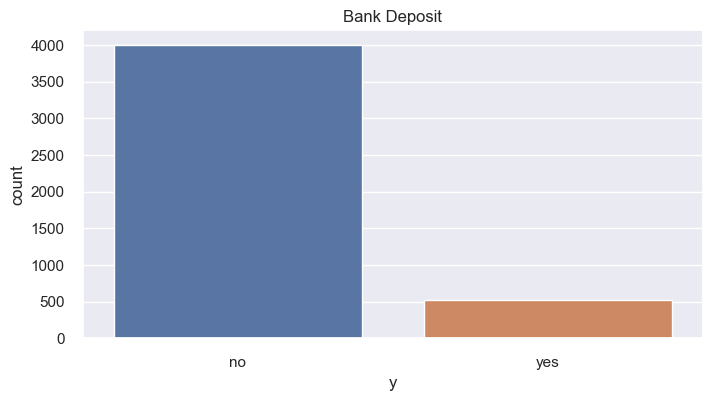

In [20]:
print(df_bank.y.value_counts())
axes1 = sns.countplot(x='y', data=df_bank)
# giving title to the plot
plt.title('Bank Deposit');

**Conclusion**
1. Bank deposit product subscribed by 521 people out of 4521
2. Bank deposit product not subscribed by 4000 people out of 4521
3. Not subscibed count is greater than the subcription so this dataset is imbalanced data

In [21]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

**Coclusion**
1. There are 16 features
2. The following features are given in the datset :

   age, job, marital, education, default, balance, housing, loan, contact, day, month, campaign, pdays, previous, poutcome, y
      

In [22]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Conclusion**
1. Numerical data : age,  balance, day, campaign, pdays, previous
2. Categorical data : job, marital, education, default, housing, loan, contact, month, poutcome, y

# **Checking Missing Values**

In [23]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Conclusion** - There is no missing value in the given dataset

# **Correlation Plot (Heatmap)**

<AxesSubplot:>

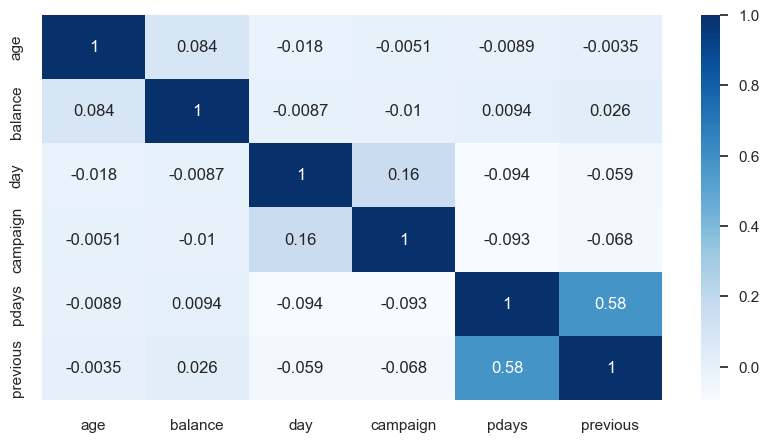

In [28]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df_bank.corr()
sns.heatmap(c,cmap="Blues",annot=True)

In [29]:
# Standardization of dataset

from sklearn.preprocessing import StandardScaler

# copy original dataframe to df_bank_numerical
df_bank_num = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_num[num_cols] = scaler.fit_transform(df_bank_num[num_cols])
df_bank_num = df_bank_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)
df_bank_num.head()


,age,balance,day,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.576829,-0.407218,-0.320413


# **Converting categorical variables to numerical variables**


In [30]:
# Encode Categorical Features 

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# copy original dataframe to df_bank_numerical
df_bank_targ = df_bank.copy()

# Drop all features and keep target 'y'
df_bank_targ = df_bank_targ.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

# Encode target value yes to 1 and no to 0
df_bank_targ['y'] = df_bank_targ['y'].apply(lambda x: 1 if x == 'yes' else 0)

df_bank_targ.head(15)


,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [31]:
# Encode Categorical Features
# OneHot encoder method is used to encode the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# copy original dataframe to df_bank_numerical
df_bank_catg = df_bank.copy()

df_bank_catg.head()
# Encode categorical Data to Numerical
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_catg[catg_cols]))
df_encoded.columns = encoder.get_feature_names(catg_cols)

# Replace Categotical Data with Encoded Data
df_bank_catg = df_bank_catg.drop(catg_cols ,axis=1)
df_bank_catg = pd.concat([df_bank_num, df_encoded, df_bank_targ], axis=1)

print('Shape of dataframe:', df_bank_catg.shape)
df_bank_catg.head()


Shape of dataframe: (4521, 51)


,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,-1.056270,0.121072,0.374052,-0.576829,-0.407218,-0.320413,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.772583,1.118644,-0.596026,-0.576829,2.989044,2.041734,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.583458,-0.024144,0.010273,-0.576829,2.899143,0.270124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,-1.056270,0.017726,-1.566105,0.387967,-0.407218,-0.320413,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.686036,-0.472753,-1.323585,-0.576829,-0.407218,-0.320413,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# **Split Dataset for Training and Testing**

Split data into two dataset, training and testing. In this case, split the data into training and testing groups with a ratio of 80:20, respectively This will result in our training data having 36168 rows and 9043 rows for the testing data.

In [32]:
# Select Features
feature = df_bank_catg.drop('y', axis=1)

# Select Target
target = df_bank_catg['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (3616, 50)
Shape of testing feature: (905, 50)
Shape of training label: (3616,)
Shape of training label: (905,)


# **Modelling**

To evaluate our model we will use the confusion matrix as our base for the evaluation.

There are 6 metrics use to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>

  Where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes



In [33]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# **Decision Tree**

A decision tree is a diagram in the shape of a tree that is used to choose a way to proceed. Each branch of the tree indicates a possible decision, occurrence, or response.

In [34]:
# Decision Tree Model

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Accuracy: 0.8077348066298342
Precision: 0.2677165354330709
Recall: 0.2956521739130435
F1 Score: 0.2809917355371901
Cohens Kappa Score: 0.17033719704952577
Area Under Curve: 0.5889653274628509
Confusion Matrix:
 [[697  93]
 [ 81  34]]


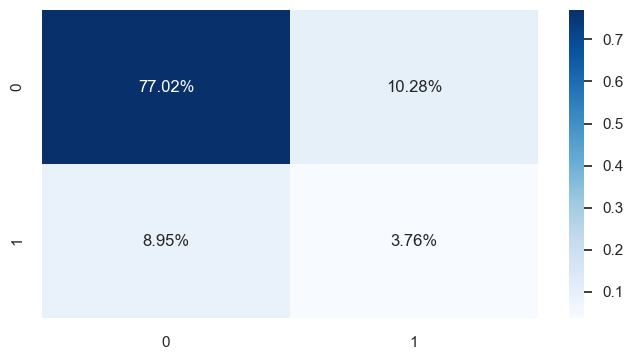

In [35]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

# **Logistic Regression**



In logistic regression, applying linear regression but applying a sigmoid function for the outcome.

<b> Sigmoid  / Logistic Function </B>

$p =1 / 1 + e^{-y}$

<b> Properties of Logistic Regression </b>

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)


In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

Accuracy: 0.8806629834254144
Precision: 0.6521739130434783
Recall: 0.13043478260869565
F1 Score: 0.21739130434782605
Cohens Kappa Score: 0.18277591973244145
Area Under Curve: 0.7306769400110072
Confusion Matrix:
 [[782   8]
 [100  15]]


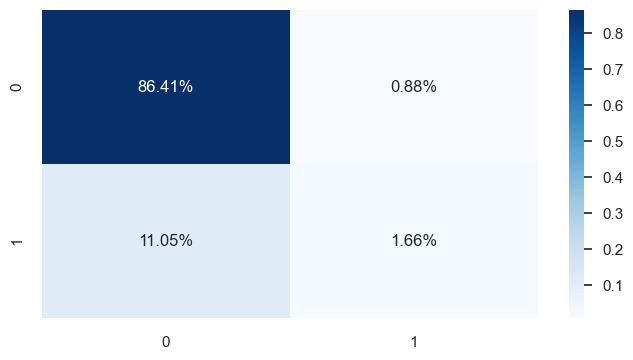

In [37]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# **Random Forest**
A technique called random forest, also known as random decision forest, builds several decision trees during training phases. The decision made by the majority of the trees refers to the final decision.

In [38]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Accuracy: 0.8729281767955801
Precision: 0.5
Recall: 0.09565217391304348
F1 Score: 0.16058394160583941
Cohens Kappa Score: 0.12486861467311328
Area Under Curve: 0.711386901485966
Confusion Matrix:
 [[779  11]
 [104  11]]


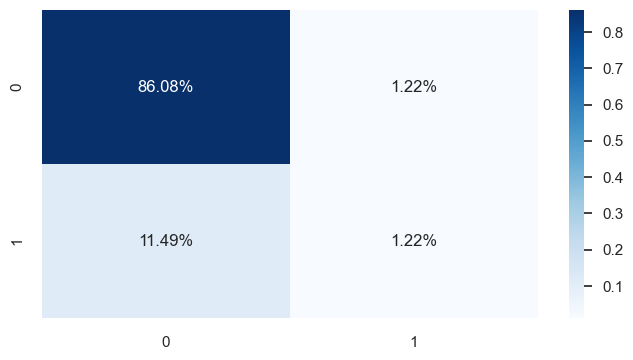

In [39]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# **Naive Bayes**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

In [40]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.8088397790055248
Precision: 0.30666666666666664
Recall: 0.4
F1 Score: 0.3471698113207547
Cohens Kappa Score: 0.23747717033970528
Area Under Curve: 0.7120143093010457
Confusion Matrix:
 [[686 104]
 [ 69  46]]


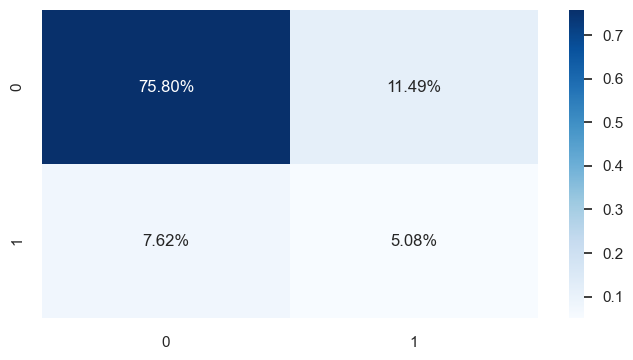

In [41]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

# **Gradient Boosting Classifier**
Gradient boosting creates prediction-based models in the form of a combination of weak prediction models. Weak hypotheses are parameters whose performance is slightly better than the randomly made choices. In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbc = GradientBoostingClassifier()

In [49]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

Accuracy: 0.8751381215469614
Precision: 0.5357142857142857
Recall: 0.13043478260869565
F1 Score: 0.20979020979020976
Cohens Kappa Score: 0.16840821305143316
Area Under Curve: 0.7461640066042927
Confusion Matrix:
 [[777  13]
 [100  15]]


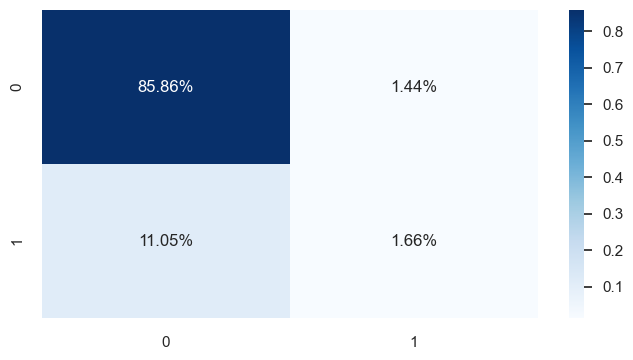

In [50]:
# Evaluate GBC Model
gbc_eval = evaluate_model(gbc, X_test, y_test)

# Print result
print('Accuracy:', gbc_eval['acc'])
print('Precision:', gbc_eval['prec'])
print('Recall:', gbc_eval['rec'])
print('F1 Score:', gbc_eval['f1'])
print('Cohens Kappa Score:', gbc_eval['kappa'])
print('Area Under Curve:', gbc_eval['auc'])
print('Confusion Matrix:\n', gbc_eval['cm'])

# **Model Comparison**
After building all of our model, we can now compare how well each model perform. To do this we will create two chart, first is a grouped bar chart to display the value of accuracy, precision, recall, f1, and kappa score of our model, and second a line chart to show the AUC of all our models.

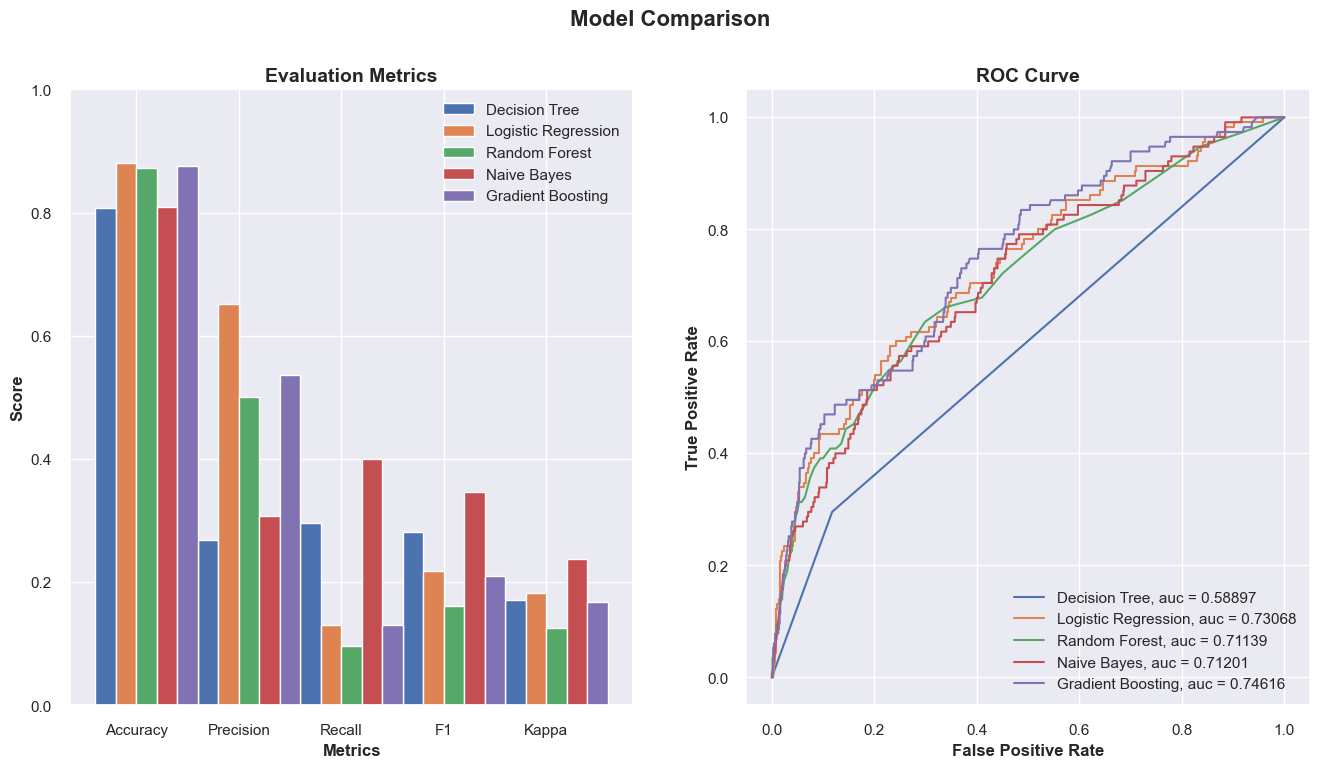

In [52]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
gbc_score = [gbc_eval['acc'], gbc_eval['prec'], gbc_eval['rec'], gbc_eval['f1'], gbc_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, gbc_score, width=barWidth, edgecolor='white', label='Gradient Boosting')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(gbc_eval['fpr'], gbc_eval['tpr'], label='Gradient Boosting , auc = {:0.5f}'.format(gbc_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Conclusion
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting. Hence from the above graph Gradient Boosting model is the best.